In [49]:
import pandas as pd
import numpy as np
import wrangle
import explore
import matplotlib.pyplot as plt
import seaborn as sns

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind, levene, pearsonr
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
data('fishing')

,site,totabund,density,meandepth,year,period,sweptarea
1,1,76,0.002070,804,1978,1977-1989,36710.000000
2,2,161,0.003520,808,2001,2000-2002,45741.253906
3,3,39,0.000981,809,2001,2000-2002,39775.000000
4,4,410,0.008039,848,1979,1977-1989,51000.000000
5,5,177,0.005933,853,2002,2000-2002,29831.251953
6,6,695,0.021801,960,1980,1977-1989,31880.000000
7,7,352,0.009191,977,1981,1977-1989,38300.000000
8,8,674,0.017616,982,1979,1977-1989,38260.000000
9,9,624,0.013991,985,1982,1977-1989,44600.000000
10,10,736,0.013992,986,1980,1977-1989,52600.000000


In [3]:
data('fishing', show_doc=True)

fishing

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## fishing

### Description

The fishing data is adapted from Zuur, Hilbe and Ieno (2013) to determine
whether the data appears to be generated from more than one generating
mechanism. The data are originally adapted from Bailey et al. (2008) who were
interested in how certain deep-sea fish populations were impacted when
commercial fishing began in locations with deeper water than in previous
years. Given that there are 147 sites that were researched, the model is of
(1) the total number of fish counted per site (totabund); ( 2) on the mean
water depth per site (meandepth); (3) adjusted by the area of the site
(sweptarea); (4) the log of which is the model offset.

### Usage

    data(fishing)

### Format

A data frame with 147 observations on the following variables.

`totabund`

total fish counted per site

`meandepth`

mean water depth per site

`sweptarea`

adjusted area of site

`dens

In [4]:
fishing = data('fishing')

In [5]:
fishing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1 to 147
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site       147 non-null    int64  
 1   totabund   147 non-null    int64  
 2   density    147 non-null    float64
 3   meandepth  147 non-null    int64  
 4   year       147 non-null    int64  
 5   period     147 non-null    object 
 6   sweptarea  147 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 9.2+ KB


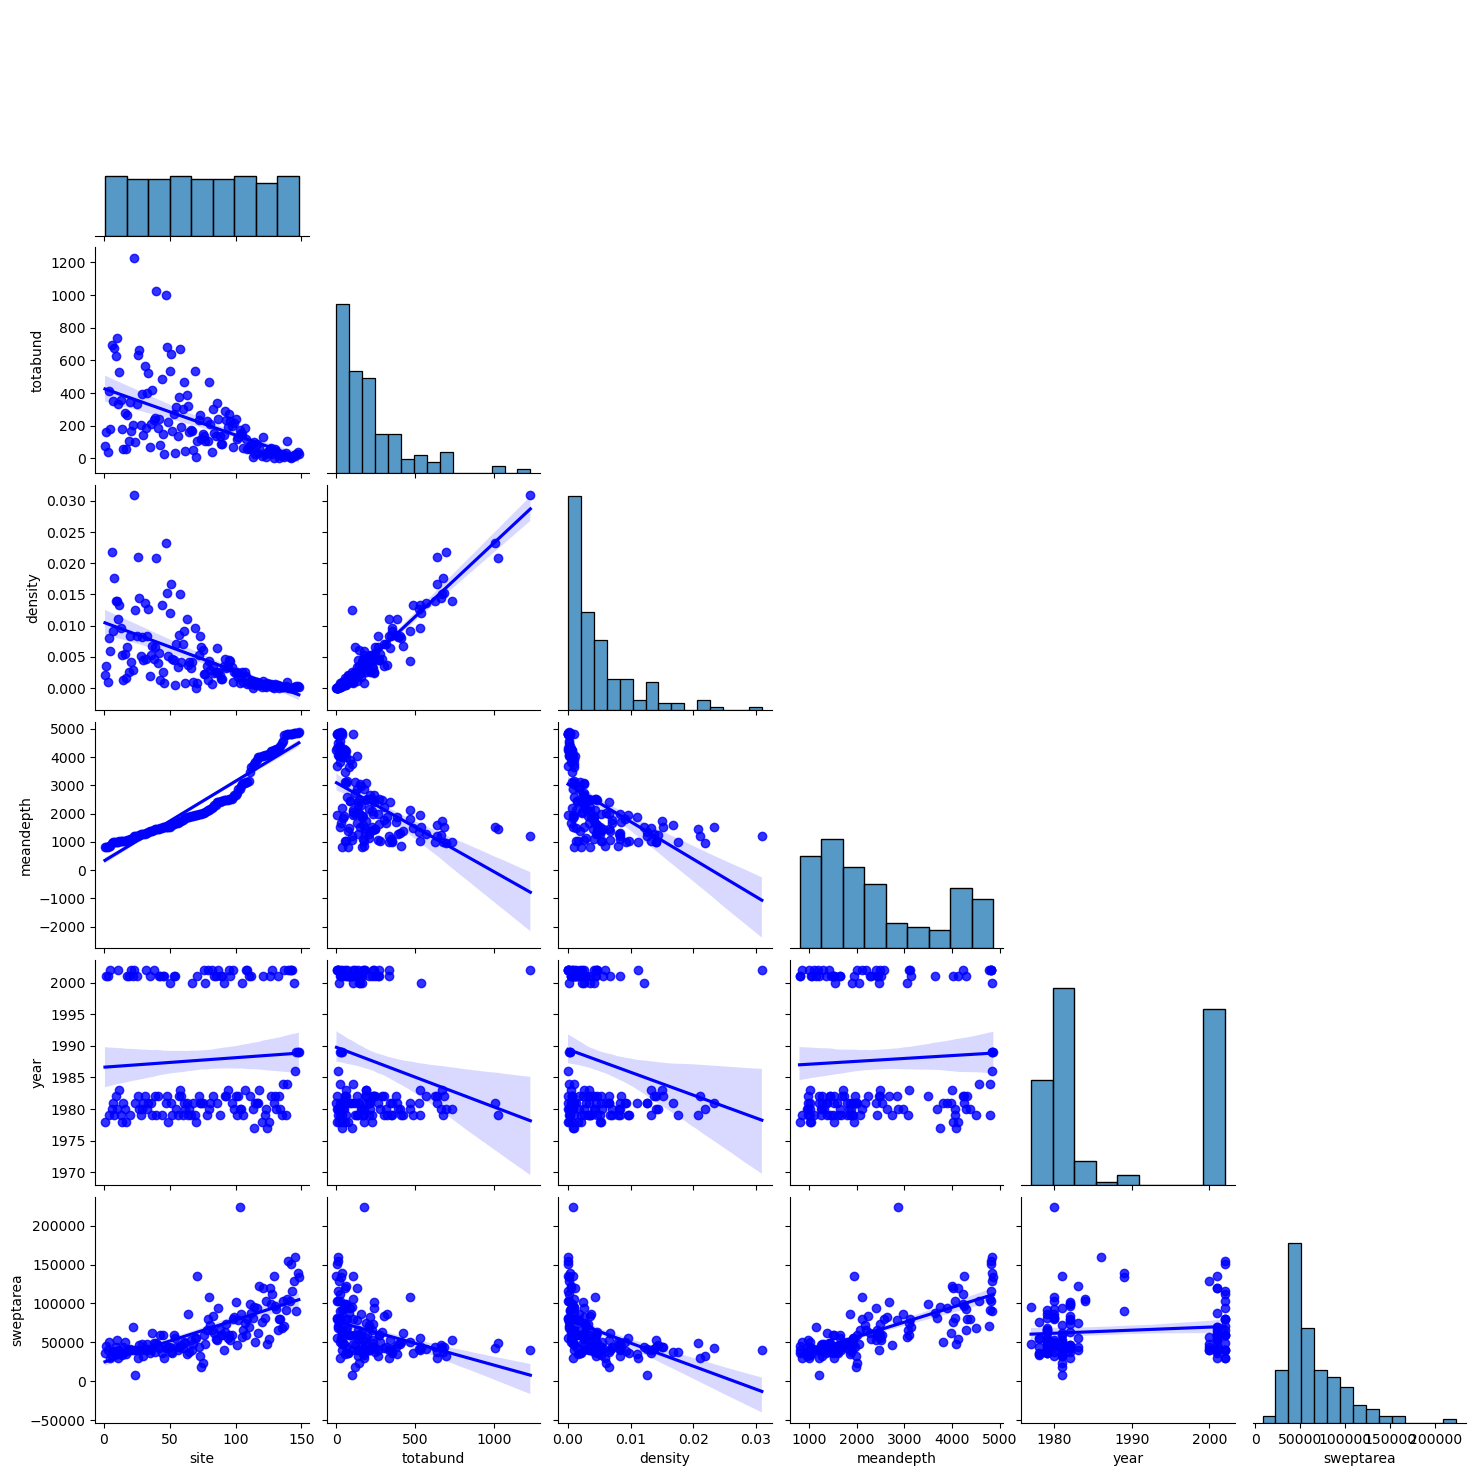

In [6]:
explore.plot_variable_pairs(fishing)

In [7]:
fishing = fishing.rename(columns={'totabund':'fish', 
                                 'sweptarea':'site_area',
                                 'meandepth':'mean_depth'})

In [8]:
fishing = fishing.drop(columns='site')

In [9]:
train, validate, test = wrangle.split_data(fishing)

In [10]:
train.head()

,fish,density,mean_depth,year,period,site_area
124,35,0.000643,4118,1978,1977-1989,54420.000000
54,31,0.000563,1648,2001,2000-2002,55022.085938
68,49,0.001012,1927,1981,1977-1989,48410.000000
136,10,0.000140,4765,2002,2000-2002,71237.031250
120,130,0.001089,4020,2001,2000-2002,119325.007812


In [11]:
X_train = train.drop(columns='fish')
y_train = train.fish
X_validate = validate.drop(columns='fish')
y_validate = validate.fish
X_test = test.drop(columns='fish')
y_test = test.fish

In [12]:
num_cols, cat_cols = [], []
# for every i in X_train's columns:
for i in X_train.columns:
    # If that thing (inside that series) is a number
    if np.issubdtype(X_train[i], np.number):
        #and if it has over 5 elements
        if X_train[i].value_counts().shape[0] > 5:
            #then we'll put that column name in an appropriate list
            num_cols.append(i)
        else:
            cat_cols.append(i)
    else:
        #otherwise its probably an object
        cat_cols.append(i)

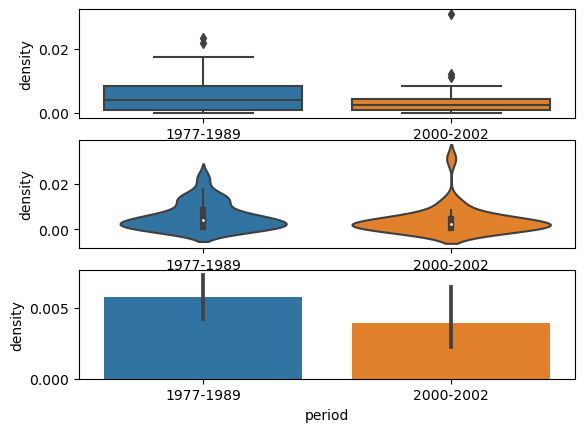

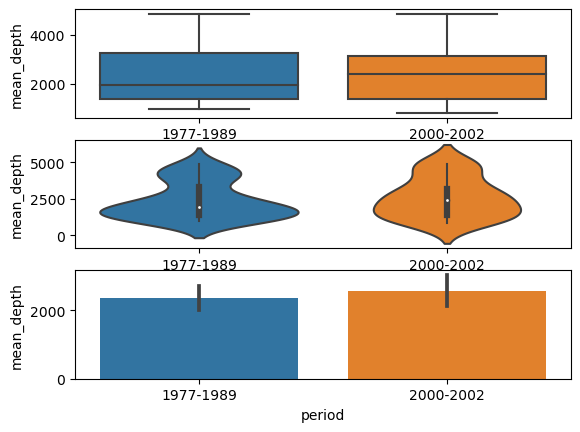

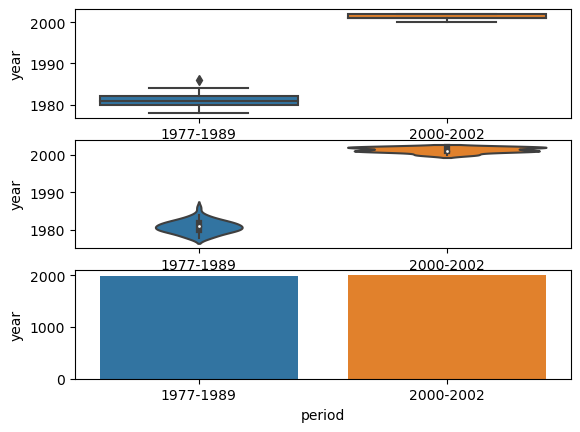

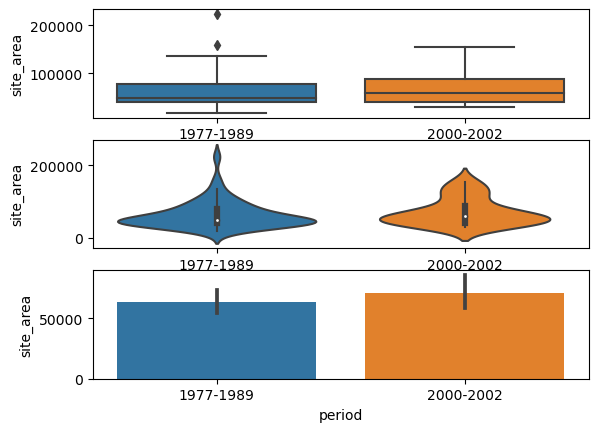

In [13]:
explore.plot_categorical_and_continuous_vars(X_train, cat_cols, num_cols)

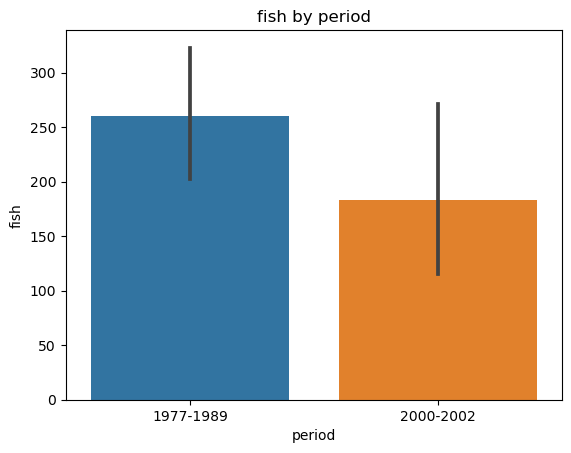

--------------


In [14]:
for col in cat_cols:
    sns.barplot(data=train, x=col, y='fish')
    plt.title(f'fish by {col}')
    plt.show()
    print('--------------')

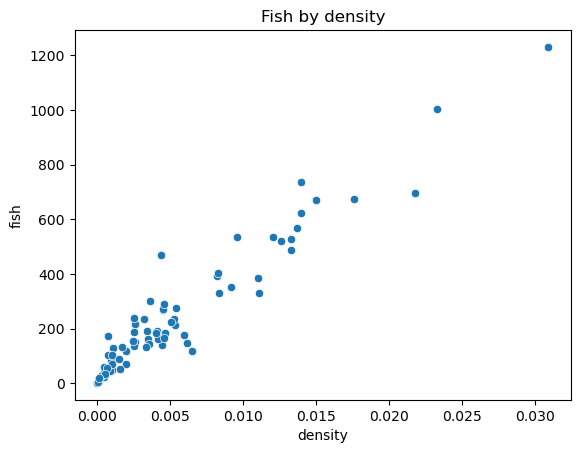

----------


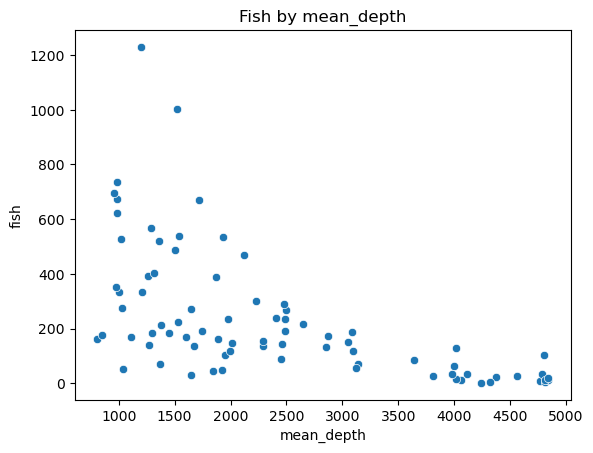

----------


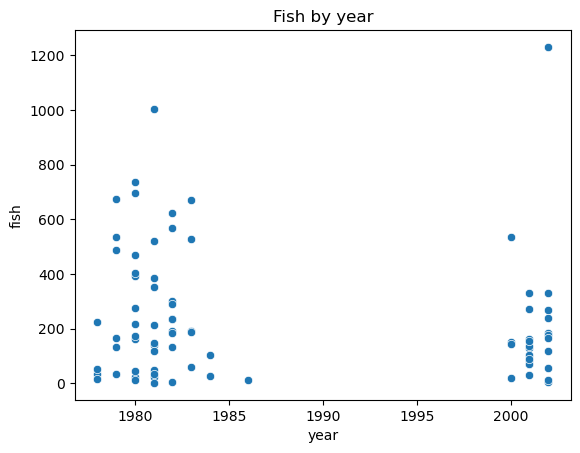

----------


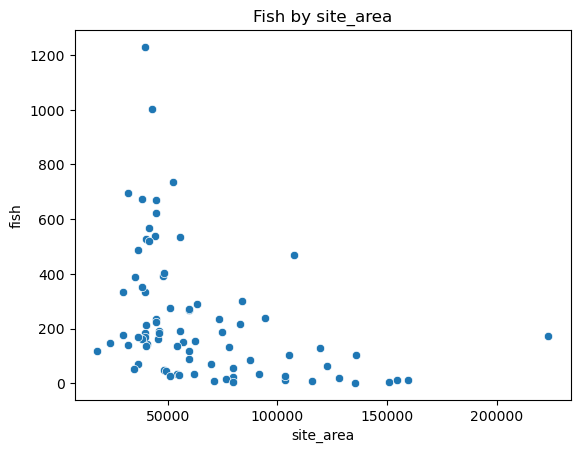

----------


In [15]:
# for continuous features:
for col in num_cols:
    sns.scatterplot(data=train, x=col, y='fish')
    plt.title(f'Fish by {col}')
    plt.show()
    print('----------')

In [16]:
train.period.value_counts()

1977-1989    52
2000-2002    29
Name: period, dtype: int64

In [17]:
before_1990 = train[train.period == '1977-1989']
after_1990 = train[~(train.period == '1977-1989')]

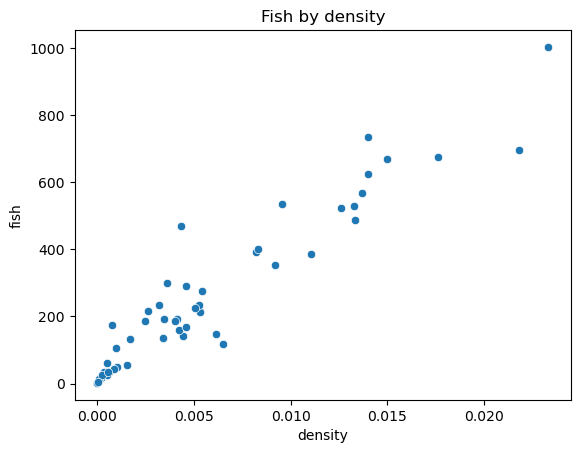

----------


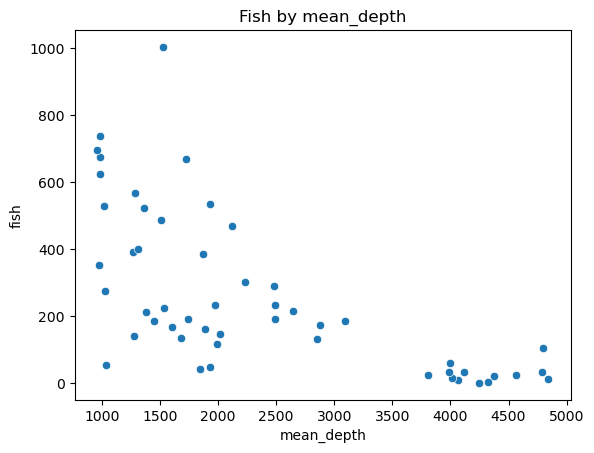

----------


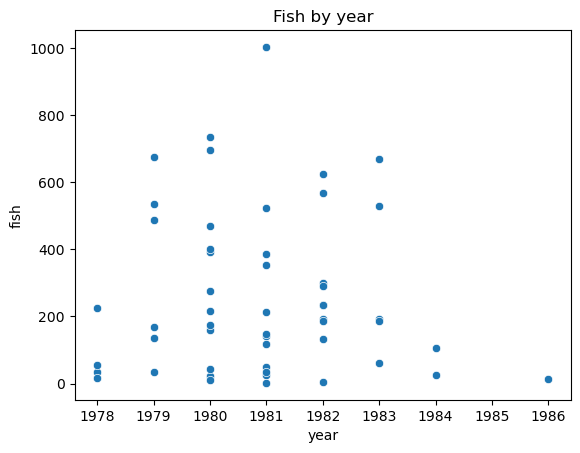

----------


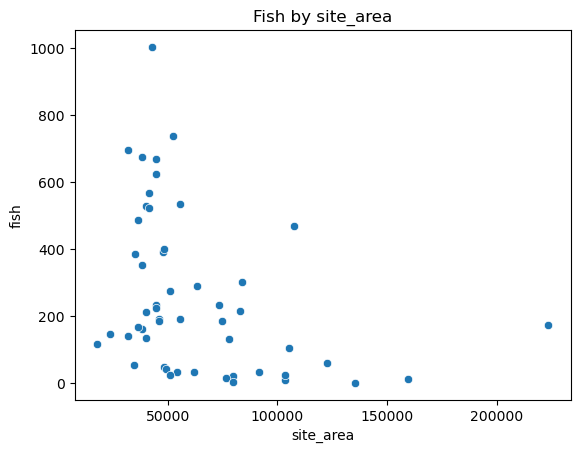

----------


In [18]:
for col in num_cols:
    sns.scatterplot(data=before_1990, x=col, y='fish')
    plt.title(f'Fish by {col}')
    plt.show()
    print('----------')

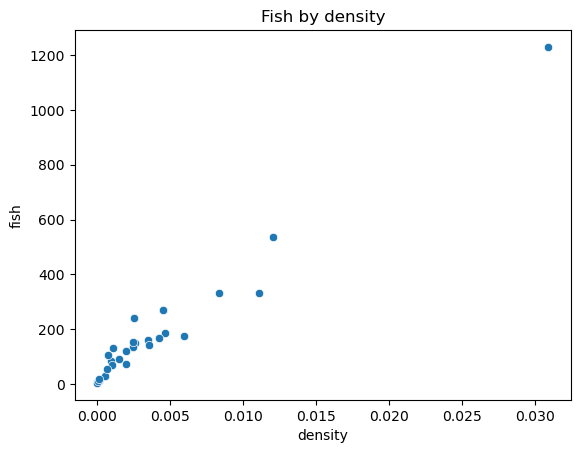

----------


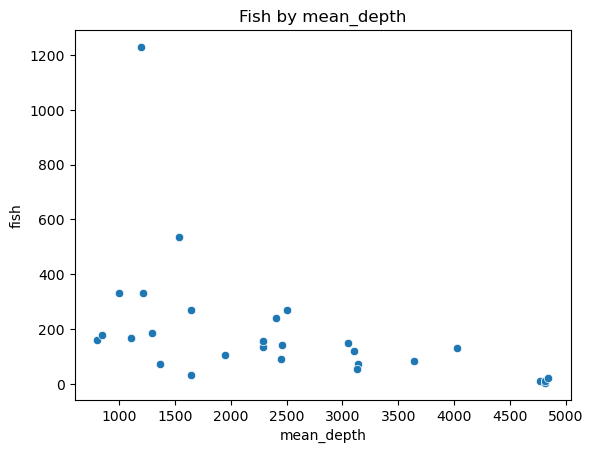

----------


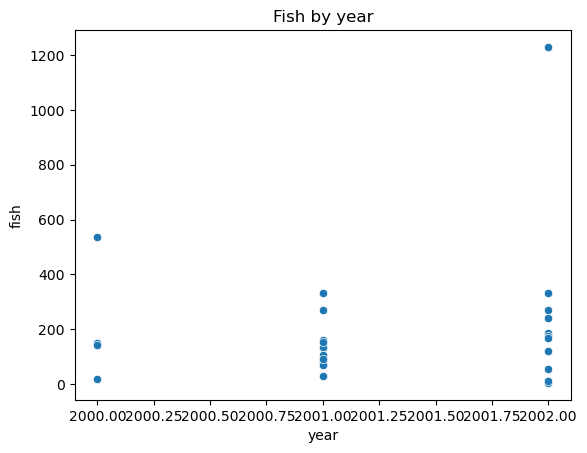

----------


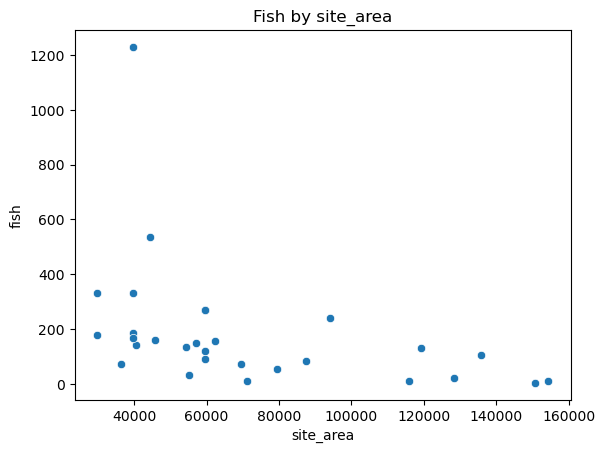

----------


In [19]:
for col in num_cols:
    sns.scatterplot(data=after_1990, x=col, y='fish')
    plt.title(f'Fish by {col}')
    plt.show()
    print('----------')

In [20]:
print(f'average number of fish before 1990: {before_1990.fish.mean()}')
print(f'average number of fish after 1990: {after_1990.fish.mean()}')

average number of fish before 1990: 259.71153846153845
average number of fish after 1990: 182.72413793103448


In [21]:
X_train['before_1990'] = train.period == '1977-1989'
X_validate['before_1990'] = validate.period == '1977-1989'
X_test['before_1990'] = test.period == '1977-1989'

In [22]:
X_train = X_train.drop(columns='period')
X_validate = X_validate.drop(columns='period')
X_test = X_test.drop(columns='period')

In [23]:
X_train.head()

,density,mean_depth,year,site_area,before_1990
124,0.000643,4118,1978,54420.000000,True
54,0.000563,1648,2001,55022.085938,False
68,0.001012,1927,1981,48410.000000,True
136,0.000140,4765,2002,71237.031250,False
120,0.001089,4020,2001,119325.007812,False


In [24]:
scale_cols = ['density', 'site_area', 'mean_depth']
scaler = MinMaxScaler()

In [25]:
scaler.fit(X_train[scale_cols])

MinMaxScaler()

In [26]:
scaled_cols = ['density_scaled', 'site_area_scaled', 'mean_depth_scaled']

In [27]:
X_train[scaled_cols] = scaler.transform(X_train[scale_cols])
X_validate[scaled_cols] = scaler.transform(X_validate[scale_cols])
X_test[scaled_cols] = scaler.transform(X_test[scale_cols])

In [28]:
X_train.head()

,density,mean_depth,year,site_area,before_1990,density_scaled,site_area_scaled,mean_depth_scaled
124,0.000643,4118,1978,54420.000000,True,0.020329,0.177558,0.820526
54,0.000563,1648,2001,55022.085938,False,0.017749,0.180488,0.208230
68,0.001012,1927,1981,48410.000000,True,0.032268,0.148314,0.277392
136,0.000140,4765,2002,71237.031250,False,0.004063,0.259389,0.980912
120,0.001089,4020,2001,119325.007812,False,0.034768,0.493382,0.796232


In [29]:
model_cols = ['before_1990','density_scaled','site_area_scaled','mean_depth_scaled']

In [41]:
before_1990.head()

,fish,density,mean_depth,year,period,site_area
124,35,0.000643,4118,1978,1977-1989,54420.0
68,49,0.001012,1927,1981,1977-1989,48410.0
94,192,0.003441,2487,1983,1977-1989,55790.0
69,534,0.009572,1932,1979,1977-1989,55790.0
63,387,0.011035,1867,1981,1977-1989,35070.0


In [42]:
after_1990.head()

,fish,density,mean_depth,year,period,site_area
54,31,0.000563,1648,2001,2000-2002,55022.085938
136,10,0.000140,4765,2002,2000-2002,71237.031250
120,130,0.001089,4020,2001,2000-2002,119325.007812
32,185,0.004651,1300,2002,2000-2002,39775.000000
142,10,0.000086,4812,2002,2000-2002,115983.898438


# Hypothesis
The average number of fish is lower after 1990

- H$_0$: The mean of fish caught is greater than or equal to before 1990 than after 1990
- H$_a$: The mean of fish caught is lower after 1990
- alpha: 0.05
- this will be a 2-sample, 1-tailed t-test

In [36]:
α = 0.05

In [37]:
# levene test to see if variances are equal
# h_0: variances are equal
# h_a: variances are not equal
r, p = levene(before_1990.fish, after_1990.fish)
if p < α:
    print(f'p-value is less than alpha, we can say that the variances are different \n\
    p-value is {p}')
else:
    print(f'p-value is greater than alpha, we can say that the variances are equal \n\
    p-value is {p}')

p-value is greater than alpha, we can say that the variances are equal 
    p-value is 0.17769973309152823


In [48]:
r, p = ttest_ind(before_1990.fish, after_1990.fish, equal_var=True)

if p > α / 2:
    print(f'we fail to reject the null hypothesis, the p-value is {p}')
else:
    print(f'we are able to reject the null hypothesis, the p-value is {p}')

we fail to reject the null hypothesis, the p-value is 0.16343028257401118


We failed to reject our null hypothesis, which tells us that there is not enough evidence to show that the amount of fish caught after 1990 was lower than before 1990.

# Hypothesis
There is a linear correlation between site depth and amount of fish caught.

- H$_0$: there is no correlation between depth and fish caught.
- H$_a$: there is a linear correlation between depth and fish caught.
- alpha: 0.05
- this will be a pearsonsr test

In [46]:
r, p = pearsonr(train.mean_depth, train.fish)

if p > α:
    print(f'we fail to reject the null hypothesis, the p-value is {p}')
else:
    print(f'we are able to reject the null hypothesis, the p-value is {p}')

we are able to reject the null hypothesis, the p-value is 5.892642122716389e-09


In [47]:
print(f'the r value is: {r}')

the r value is: -0.5919221121294023


The pearsons r test shows that there is a linear correlation between depth and fish caught.

### Feature selection

In [52]:
model_cols

['before_1990', 'density_scaled', 'site_area_scaled', 'mean_depth_scaled']

In [56]:
# parameters: f_regression stats test, give me 3 features
f_selector = SelectKBest(f_regression, k=3)

# find the top 3 X's correlated with y
f_selector.fit(X_train[model_cols], y_train)

# boolean mask of whether the column was selected or not. 
feature_mask = f_selector.get_support()

# get list of top K features. 
f_feature = X_train[model_cols].iloc[:,feature_mask].columns.tolist()

In [57]:
# here are the 3 best features to use according to the kbest 
f_feature

['density_scaled', 'site_area_scaled', 'mean_depth_scaled']